In [1]:
import numpy as np
from matplotlib import pyplot as plt
import imageio

import cv2
from scipy import stats

/tmp/ipykernel_698634/31945960.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  to_reconstruct = imageio.imread(folderpath+"isxd_"+str(to_reconstruct_index)+".png")


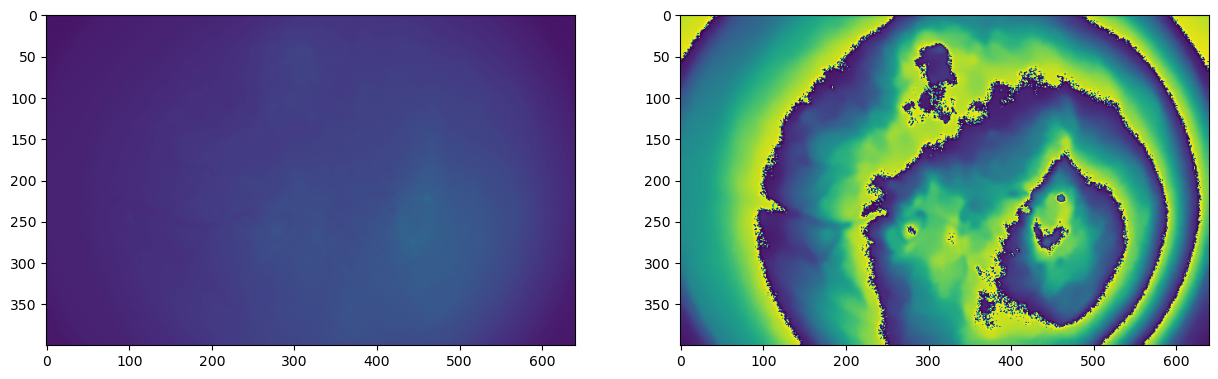

In [37]:
to_reconstruct_index = 9
folderpath = "../data/real_images_unpadded/"
# folderpath = "../data/real_images/"
# to_reconstruct = imageio.imread(folderpath+"image_"+str(to_reconstruct_index)+".png")
to_reconstruct = imageio.imread(folderpath+"isxd_"+str(to_reconstruct_index)+".png")

fig, axs = plt.subplots(1,2, figsize=(15,15))
axs[0].imshow(to_reconstruct)
denoised_img = np.empty_like(to_reconstruct.astype(np.uint8))
# cv2.fastNlMeansDenoising((to_reconstruct/64).astype(np.uint8), denoised_img, 20)
cv2.fastNlMeansDenoising((to_reconstruct).astype(np.uint8), denoised_img, 20)
axs[1].imshow(denoised_img)

In [3]:
np.max(to_reconstruct)

4080

False


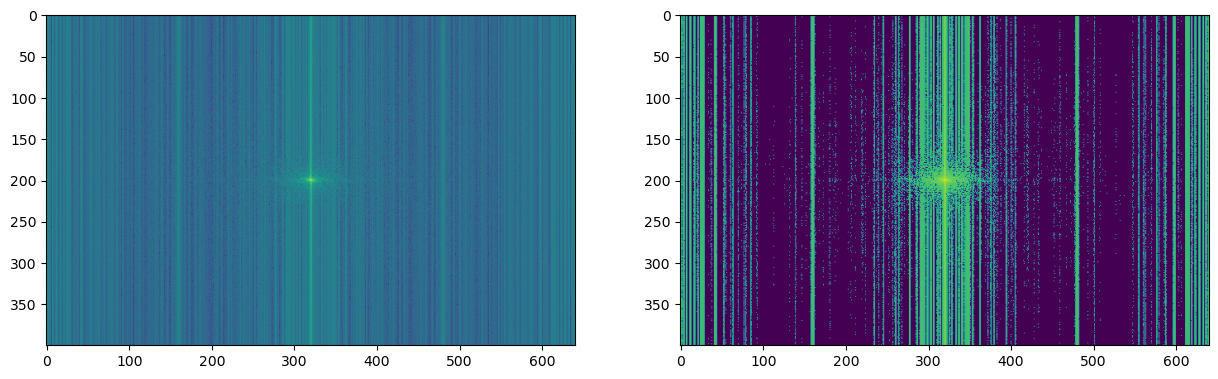

In [42]:
fig, axs = plt.subplots(1,2, figsize=(15,15))
fft_img = np.abs(np.fft.fftshift(np.fft.fft2(to_reconstruct)))

axs[0].imshow(20*np.log(fft_img))
print(np.any(np.maximum(0, fft_img - np.median(fft_img)) < 0))
axs[1].imshow(20*np.log(np.maximum(0.00001, fft_img - np.mean(fft_img))))

/tmp/ipykernel_698634/1001823436.py:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.ravel(higher_than)))
/home/dshteinbok/miniconda3/envs/tf/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


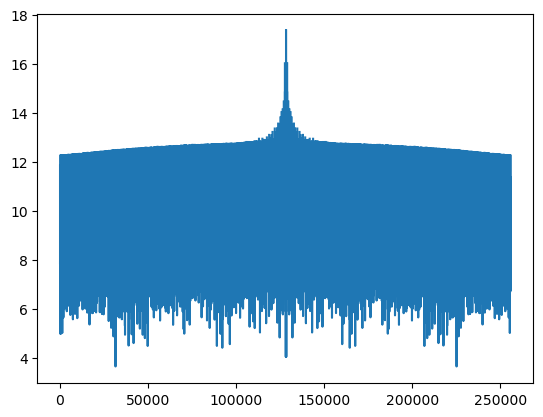

In [40]:
# higher_than = fft_img[fft_img > np.exp(11)]
higher_than = fft_img
plt.plot(np.log(np.ravel(higher_than)))

In [6]:
# plt.imshow(np.real(np.fft.ifft2(np.fft.ifftshift(np.maximum(0.00001, fft_img - np.mean(fft_img))))))

In [7]:
np.log?

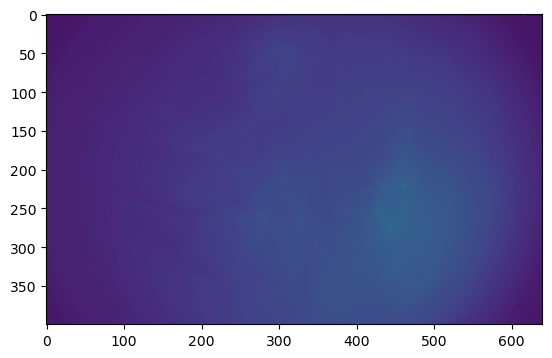

In [8]:
plt.imshow(np.real(np.fft.ifft2(np.fft.fftshift(np.fft.fftshift(np.fft.fft2(to_reconstruct))))))

(400, 640)


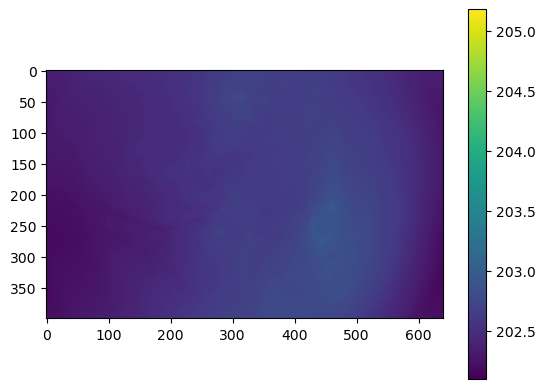

In [9]:
fft_img = np.fft.fftshift(np.fft.fft2(to_reconstruct))

# fft_img = fft_img - np.mean(fft_img)
print(fft_img.shape)
# print(stats.mode(fft_img))
# fft_img = fft_img - np.mean(fft_img)

# print(fft_img.shape)
# fft_img[np.abs(fft_img) < np.exp(11)] = 0
fft_img[:,320] = 0

# fig, axs = plt.subplots(1,2, figsize=(15,15))

# axs[0].imshow(50*to_reconstruct)
# axs[1].imshow(50*(np.real(np.fft.ifft2(np.fft.fftshift(fft_img)))))
# axs[1].imshow(np.log(np.abs(fft_img)))
plt.imshow(20*np.log(np.real(np.fft.ifft2(np.fft.fftshift(fft_img)))+25000))
plt.colorbar()

In [10]:
np.max(np.real(np.fft.ifft2(np.fft.fftshift(fft_img))))

3539.600000000001

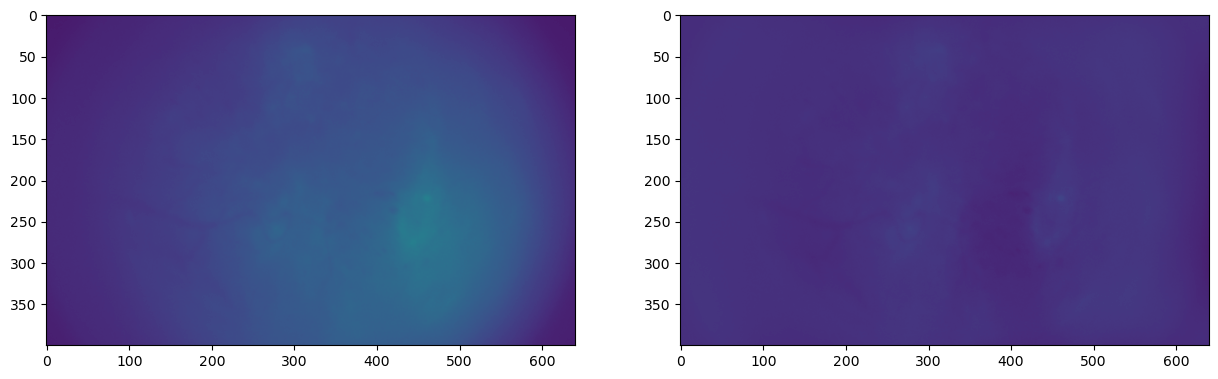

In [39]:
from scipy.fftpack import dct, idct

bg_dct = dct(dct(to_reconstruct, axis=0), axis=1)
bg_dct[0:5, 0:5] = 0

fig, axs = plt.subplots(1,2, figsize=(15,15))
axs[0].imshow(20*to_reconstruct)
# axs[1].imshow(dct(to_reconstruct)[0:30,0:30])
# axs[1].imshow(bg_dct[0:30, 0:30])
# axs[1].imshow(idct(bg_dct))
axs[1].imshow(idct(idct(bg_dct, axis=1), axis=0))

In [26]:
np.mean(bg_dct[0:5, 0:5])

18087738.50255645

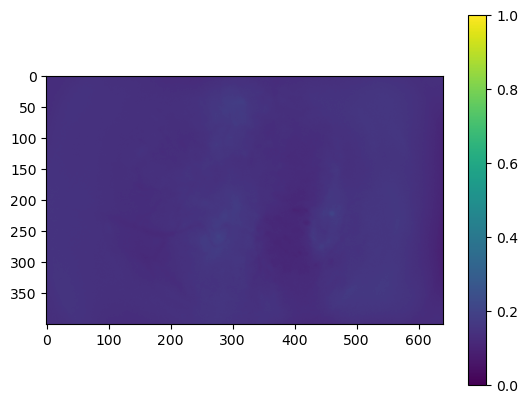

In [43]:
bg_dct = dct(dct(to_reconstruct, axis=0), axis=1)
bg_dct[0:5, 0:5] = 0

detransformed = idct(idct(bg_dct, axis=1), axis=0)
detransformed_rescaled = detransformed - np.min(detransformed)
detransformed_rescaled = detransformed_rescaled/np.max(detransformed_rescaled)
# detransformed_rescaled[detransformed_rescaled > 0.6] = 0.6
plt.imshow(detransformed_rescaled)
plt.colorbar()

In [14]:
np.max(idct(bg_dct))

1020802560.0

In [15]:
np.max(to_reconstruct)

4080

## Trying to replicate the background
I've seen that the noise can kind of be removed by cutting out the low frequencies in the DCT. Now, I'll try to replicate the noise by loading a clear image and adding to the low frequencies:

In [16]:
test_img = imageio.imread('../data/nV3_resized/1.png')

/tmp/ipykernel_698634/3807802378.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  test_img = imageio.imread('../data/nV3_resized/1.png')


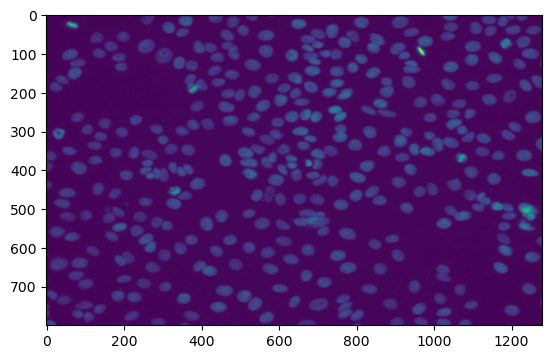

In [17]:
plt.imshow(test_img)

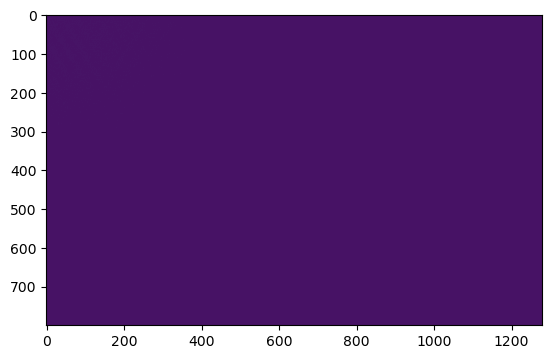

In [18]:
test_dct = dct(dct(test_img, axis=0), axis=1)
plt.imshow(test_dct)

In [19]:
np.max(test_dct)

90231476.0

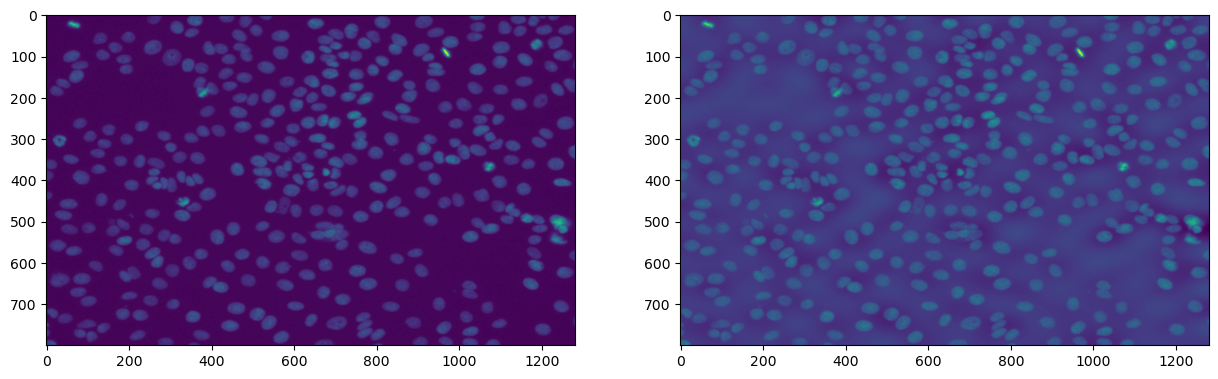

In [20]:
test_dct = dct(dct(test_img, axis=0), axis=1)
test_dct[0:19,0:19] += 1e6
test_dct[0:19,0:19] = 0

fig, axs = plt.subplots(1,2,figsize=(15,15))

axs[0].imshow(test_img)
axs[1].imshow(idct(idct(test_dct, axis=1), axis=0))

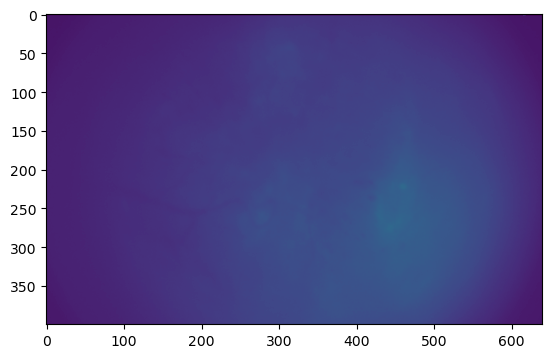

In [44]:
plt.imshow(to_reconstruct)